# Logistic Regression

#### 1. Load libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
import statistics
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score


#### 2. Load in data and Select Model Features

In [2]:
data_path = 'https://raw.githubusercontent.com/kvinlazy/Dataset/master/ChurnData.csv'
df = pd.read_csv(data_path)
df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless', 'churn']]
df.churn = df.churn.astype('int') # Need to coerce outcome variable to numeric

In [3]:
df_names = df.columns.values.tolist()
print(
    f'There are {len(df)} rows and {len(df.columns)} columns in the data.',
    f'The columns are named: {", ".join([name for name in df_names])}'
)

There are 200 rows and 10 columns in the data. The columns are named: tenure, age, address, income, ed, employ, equip, callcard, wireless, churn


#### 3. Data preprocessing

We'll need to select our target and feature as well as normalize our data.

In [4]:
X = np.asarray(df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
y = np.asarray(df.churn)

In [5]:
X = preprocessing.StandardScaler().fit(X).transform(X)

# Check that we have a standard deviation of 1 and mean of 0
flattened = []
for lst in X:
    for sublist in lst:
        flattened.append(sublist)

print(
    f'The mean is {np.round(np.mean(flattened), 1)} and the standard deviation is',
    f' {np.round(statistics.stdev(flattened), 1)}'
)

The mean is -0.0 and the standard deviation is  1.0


#### 4. Modeling

Split the data into training and testing sets.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


Fit the model.

In [7]:
logit = LogisticRegression(C=0.01, solver='liblinear')
logit.fit(X_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

Make predictions.

In [8]:
yhat = logit.predict(X_test)

While the above predicted the class of an observation, we can also retrieve the probability that an individual will be in each class by calling on the `predict_proba` method.

In [9]:
yhat_prob = logit.predict_proba(X_test)
yhat_prob[0:10]

array([[0.40130629, 0.59869371],
       [0.54455897, 0.45544103],
       [0.49631135, 0.50368865],
       [0.5432107 , 0.4567893 ],
       [0.50668766, 0.49331234],
       [0.51800365, 0.48199635],
       [0.70742493, 0.29257507],
       [0.60829538, 0.39170462],
       [0.49611884, 0.50388116],
       [0.37389734, 0.62610266]])

The above returns two columns because there are two possible classes. The first column predicts the probablity of being in class 0 and the second returns the probablity of being in class 1. `sklearn` will return one column for each class ordered by the label of the class. The probability of each row will sum to 1.

Because an array of nested lists can be difficult to work with, we can also transform the output into a pandas data frame if we ever needed to work with the probabilities directly. Additionally, we can easily check to see that the sum of the probabilities for each observation for each class will sum to one.

In [12]:
class0_probabilities = []
class1_probabilities = []
for lst in yhat_prob:
    for idx, prob in enumerate(lst):
        if idx == 0:
            class0_probabilities.append(prob)
        elif idx == 1:
            class1_probabilities.append(prob)

prob_df = pd.DataFrame({
    'observation_id': [num for num in range(1, len(class0_probabilities) + 1)],
    'class0_prob': class0_probabilities,
    'class1_prob': class1_probabilities
})

prob_df['prob_sum'] = prob_df['class0_prob'] + prob_df['class1_prob']

prob_df.head()


range(1, 40)


#### 5. Model Evaluation

We can use the jaccard score which is the size of the intersection divided by the union of the two label sets. If the entire set of the predicted labels matches the true set of labels, then the accuracy is 1. The score ranges from 0 to 1, with 1 being a "better" score.

In [17]:
jaccard_score(y_true=y_test, y_pred=yhat, pos_label=0)

0.6666666666666666

We can also look at the confusion matrix.

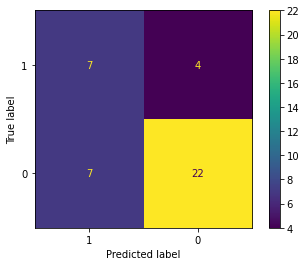

In [29]:
cm = confusion_matrix(y_true=y_test, y_pred=yhat, labels=[1, 0]) 
cmd = ConfusionMatrixDisplay(cm, display_labels=[1, 0])
cmd.plot()

From the confusion matrix above, the number of correctly predicted classes runs along the diagonal. The logistic regression model predicted 22 observations to be in class 0 and 22 of them were indeed in class 0. The model also predicted 7 observations to be in class 1 and 7 of them were indeed in class 1. This leads to an accuracy score of:

In [35]:
accuracy_score(y_true=y_test, y_pred=yhat)

0.725